# Projet BENOIST SARRASIN SULINON


Your goal is to find out the `weight` of the user

There are 3 main parts:

* Data Import & Cleaning, the output of this part is provided in the csv file `examination.csv` and `diet.csv`, 
* Modeling with the cleaned data
* Predict what you are looking for

# Data Import

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

#os.chdir("/content/drive/shared-with-me/Projet")
os.chdir("/content/drive/My Drive/ECE/Projet")
#os.chdir("/content/drive/My Drive/ECE/Machine Learning/Colab/projetML") # steph


!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Colonne à filtrer.gsheet'  'food_coded (1).csv'   inchallah.ipynb
 diet.csv		     food_coded.csv	   Projet.ipynb
 examination.csv	     food_coded.gsheet


1.1. Load the csv file `data.csv` into a dataframe called `df` and print its shape. (Set the right parameters when reading the csv file)       

In [17]:
df1 = pd.read_csv('diet.csv', index_col=0)
df2 = pd.read_csv('examination.csv', index_col=0)

df1.shape
print(df1.shape)

df2.shape
print(df2.shape)

(9813, 167)
(9813, 223)


In [0]:
# check if df shape is correct
assert df1.shape == (9813, 167)
assert df2.shape == (9813, 223)

1.2. print the head of `df`

In [18]:
df1.head(3)

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,...,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df2.head(3)

,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,...,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260D,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXTSEQ,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,2.0,114.0,76.0,2.0,102.0,74.0,2.0,NaN,NaN,NaN,1,78.3,NaN,NaN,NaN,NaN,NaN,171.3,NaN,26.7,NaN,39.2,NaN,40.2,NaN,35.3,NaN,100.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,54.0,35.0,20.0,55.0,15.0,4.0,50.0,1.0,50.0,2.0,65.0,1.0,60.0,1.0,B,2.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,2.0,160.0,80.0,2.0,156.0,42.0,2.0,NaN,NaN,NaN,1,89.5,NaN,NaN,NaN,NaN,NaN,176.8,NaN,28.6,NaN,40.0,NaN,41.5,NaN,34.7,NaN,107.6,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0,40.0,36.0,17.0,51.0,1.0,4.0,5.0,4.0,57.0,2.0,33.0,1.0,27.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,2.0,140.0,76.0,2.0,146.0,80.0,2.0,NaN,NaN,NaN,1,88.9,NaN,NaN,NaN,NaN,NaN,175.3,NaN,28.9,NaN,40.0,NaN,41.0,NaN,33.5,NaN,109.2,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,29.0,50.0,24.0,20.0,47.0,17.0,1.0,27.0,1.0,56.0,2.0,53.0,1.0,32.0,1.0,A,2.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0


# Data Cleaning

 ## Drop columns

In [20]:
#Colonne à droper
diet_to_drop = [
  'WTDRD1' , 'WTDR2D' , 'DR1DRSTZ' , 'DR1EXMER' , 'DRABF' , 'DRDINT' , 'DR1DBIH' , 'DR1DAY' , 'DR1LANG' , 'DR1MNRSP' , 'DR1HELPD' , 'DBQ095Z' , 'DRQSPREP' , 'DR1STY' , 'DR1SKY' , 'DRQSDIET' , 'DRQSDT1' , 'DRQSDT2' , 'DRQSDT3' , 'DRQSDT4' , 'DRQSDT5' , 'DRQSDT6' , 'DRQSDT7' , 'DRQSDT8' , 'DRQSDT9' , 'DRQSDT10' , 'DRQSDT11' , 'DRQSDT12' , 'DRQSDT91' , 'DR1TNUMF' , 'DR1TPROT' , 'DR1TCARB' , 'DR1TSUGR' , 'DR1TFIBE' , 'DR1TTFAT' , 'DR1TSFAT' , 'DR1TMFAT' , 'DR1TPFAT' , 'DR1TCHOL' , 'DR1TATOC' , 'DR1TATOA' , 'DR1TRET' , 'DR1TVARA' , 'DR1TACAR' , 'DR1TBCAR' , 'DR1TCRYP' , 'DR1TLYCO' , 'DR1TLZ' , 'DR1TVB1' , 'DR1TVB2' , 'DR1TNIAC' , 'DR1TVB6' , 'DR1TFOLA' , 'DR1TFA' , 'DR1TFF' , 'DR1TFDFE' , 'DR1TCHL' , 'DR1TVB12' , 'DR1TB12A' , 'DR1TVC' , 'DR1TVD' , 'DR1TVK' , 'DR1TCALC' , 'DR1TPHOS' , 'DR1TMAGN' , 'DR1TIRON' , 'DR1TZINC' , 'DR1TCOPP' , 'DR1TSODI' , 'DR1TPOTA' , 'DR1TSELE' , 'DR1TCAFF' , 'DR1TTHEO' , 'DR1TMOIS' , 'DR1TS040' , 'DR1TS060' , 'DR1TS080' , 'DR1TS100' , 'DR1TS120' , 'DR1TS140' , 'DR1TS160' , 'DR1TS180' , 'DR1TM161' , 'DR1TM181' , 'DR1TM201' , 'DR1TM221' , 'DR1TP182' , 'DR1TP183' , 'DR1TP184' , 'DR1TP204' , 'DR1TP205' , 'DR1TP225' , 'DR1TP226' , 'DR1.300' , 'DR1.320Z' , 'DR1.330Z' , 'DR1BWATZ' , 'DR1TWS' , 'DRD340' , 'DRD350A' , 'DRD350AQ' , 'DRD350B' , 'DRD350BQ' , 'DRD350C' , 'DRD350CQ' , 'DRD350D' , 'DRD350DQ' , 'DRD350E' , 'DRD350EQ' , 'DRD350F' , 'DRD350FQ' , 'DRD350G' , 'DRD350GQ' , 'DRD350H' , 'DRD350HQ' , 'DRD350I' , 'DRD350IQ' , 'DRD350J' , 'DRD350JQ' , 'DRD350K' , 'DRD360' , 'DRD370A' , 'DRD370AQ' , 'DRD370B' , 'DRD370BQ' , 'DRD370C' , 'DRD370CQ' , 'DRD370D' , 'DRD370DQ' , 'DRD370E' , 'DRD370EQ' , 'DRD370F' , 'DRD370FQ' , 'DRD370G' , 'DRD370GQ' , 'DRD370H' , 'DRD370HQ' , 'DRD370I' , 'DRD370IQ' , 'DRD370J' , 'DRD370JQ' , 'DRD370K' , 'DRD370KQ' , 'DRD370L' , 'DRD370LQ' , 'DRD370M' , 'DRD370MQ' , 'DRD370N' , 'DRD370NQ' , 'DRD370O' , 'DRD370OQ' , 'DRD370P' , 'DRD370PQ' , 'DRD370Q' , 'DRD370QQ' , 'DRD370R' , 'DRD370RQ' , 'DRD370S' , 'DRD370SQ' , 'DRD370T' , 'DRD370TQ' , 'DRD370U' , 'DRD370UQ' , 'DRD370V'
]

examination_to_drop = [
  'OHX01TC' , 'OHX02TC' , 'BMDBMIC' , 'CSQ450' ,'PEASCST1' , 'PEASCTM1' , 'PEASCCT1' , 'BPXCHR' , 'BPAARM' , 'BPACSZ' , 'BPXPLS' , 'BPXPULS' , 'BPXPTY' , 'BPXML1' , 'BPXSY1' , 'BPXDI1' , 'BPAEN1' , 'BPXSY2' , 'BPXDI2' , 'BPAEN2' , 'BPXSY3' , 'BPXDI3' , 'BPAEN3' , 'BPXSY4' , 'BPXDI4' , 'BPAEN4' , 'BMDSTATS' , 'BMIWT' , 'BMXRECUM' , 'BMIRECUM' , 'BMXHEAD' , 'BMIHEAD' , 'BMIHT', 'BMXLEG' , 'BMILEG' , 'BMXARML' , 'BMIARML' , 'BMXARMC' , 'BMIARMC' , 'BMXWAIST' , 'BMIWAIST' , 'BMXSAD1' , 'BMXSAD2' , 'BMXSAD3' , 'BMXSAD4' , 'BMDAVSAD' , 'BMDSADCM' , 'MGDEXSTS' , 'MGD050' , 'MGD060' , 'MGQ070' , 'MGQ080' , 'MGQ090' , 'MGQ100' , 'MGQ110' , 'MGQ120' , 'MGD130' , 'MGQ90DG' , 'MGDSEAT' , 'MGAPHAND' , 'MGATHAND' , 'MGXH1T1' , 'MGXH1T1E' , 'MGXH2T1' , 'MGXH2T1E' , 'MGXH1T2' , 'MGXH1T2E' , 'MGXH2T2' , 'MGXH2T2E' , 'MGXH1T3' , 'MGXH1T3E' , 'MGXH2T3' , 'MGXH2T3E' , 'MGDCGSZ' , 'OHDEXSTS' , 'OHXIMP' , 'OHX03TC' , 'OHX04TC' , 'OHX05TC' , 'OHX06TC' , 'OHX07TC' , 'OHX08TC' , 'OHX09TC' , 'OHX10TC' , 'OHX11TC' , 'OHX12TC' , 'OHX13TC' , 'OHX14TC' , 'OHX15TC' , 'OHX16TC' , 'OHX17TC' , 'OHX18TC' , 'OHX19TC' , 'OHX20TC' , 'OHX21TC' , 'OHX22TC' , 'OHX23TC' , 'OHX24TC' , 'OHX25TC' , 'OHX26TC' , 'OHX27TC' , 'OHX28TC' , 'OHX29TC' , 'OHX30TC' , 'OHX31TC' , 'OHX32TC' , 'OHX02CTC' , 'OHX03CTC' , 'OHX04CTC' , 'OHX05CTC' , 'OHX06CTC' , 'OHX07CTC' , 'OHX08CTC' , 'OHX09CTC' , 'OHX10CTC' , 'OHX11CTC' , 'OHX12CTC' , 'OHX13CTC' , 'OHX14CTC' , 'OHX15CTC' , 'OHX18CTC' , 'OHX19CTC' , 'OHX20CTC' , 'OHX21CTC' , 'OHX22CTC' , 'OHX23CTC' , 'OHX24CTC' , 'OHX25CTC' , 'OHX26CTC' , 'OHX27CTC' , 'OHX28CTC' , 'OHX29CTC' , 'OHX30CTC' , 'OHX31CTC' , 'OHX02CSC' , 'OHX03CSC' , 'OHX04CSC' , 'OHX05CSC' , 'OHX06CSC' , 'OHX07CSC' , 'OHX08CSC' , 'OHX09CSC' , 'OHX10CSC' , 'OHX11CSC' , 'OHX12CSC' , 'OHX13CSC' , 'OHX14CSC' , 'OHX15CSC' , 'OHX18CSC' , 'OHX19CSC' , 'OHX20CSC' , 'OHX21CSC' , 'OHX22CSC' , 'OHX23CSC' , 'OHX24CSC' , 'OHX25CSC' , 'OHX26CSC' , 'OHX27CSC' , 'OHX28CSC' , 'OHX29CSC' , 'OHX30CSC' , 'OHX31CSC' , 'OHX02SE' , 'OHX03SE' , 'OHX04SE' , 'OHX05SE' , 'OHX07SE' , 'OHX10SE' , 'OHX12SE' , 'OHX13SE' , 'OHX14SE' , 'OHX15SE' , 'OHX18SE' , 'OHX19SE' , 'OHX20SE' , 'OHX21SE' , 'OHX28SE' , 'OHX29SE' , 'OHX30SE' , 'OHX31SE' , 'CSXEXCMT' , 'CSQ245' , 'CSQ260A' , 'CSQ260D' , 'CSQ260G' , 'CSQ260I' , 'CSQ260N' , 'CSQ260M' , 'CSQ270' , 'CSQ460' , 'CSQ470' , 'CSQ480' , 'CSQ490' , 'CSXQUIPG' , 'CSXQUIPT' , 'CSXNAPG' , 'CSXNAPT' , 'CSXQUISG' , 'CSXQUIST' , 'CSXSLTSG' , 'CSXSLTST' , 'CSXNASG' , 'CSXNAST' , 'CSXTSEQ' , 'CSXCHOOD' , 'CSXSBOD' , 'CSXSMKOD' , 'CSXLEAOD' , 'CSXSOAOD' , 'CSXGRAOD' , 'CSXONOD' , 'CSXNGSOD' , 'CSXSLTRT' , 'CSXSLTRG' , 'CSXNART' , 'CSXNARG' , 'CSAEFFRT'
]

df1.drop(diet_to_drop, axis = 1, inplace = True)
df1.shape
print(df1.shape)

df2.drop(examination_to_drop, axis = 1, inplace = True)
df2.shape
print(df2.shape)

(9813, 3)
(9813, 6)


In [21]:
#Rename columns
df1.rename(columns={"SEQN" : "id", "DBD100" : "salt", "DR1TKCAL" : "calories" , "DR1TALCO" : "alcohol" }, inplace=True)
# df .rename(columns={"A": "a", "B": "c"})

df1.head(3)



,salt,calories,alcohol
SEQN,,,
73557,2.0,1574.0,0.0
73558,2.0,5062.0,119.0
73559,1.0,1743.0,0.0


In [22]:
#Rename columns
#COUNT des dents si possible

df2.rename(columns={"SEQN" : "id", "BMXWT" : "weight", "BMXHT" : "height" , "BMXBMI" : "mass_index", "OHDDESTS" : "dentition", "CSXEXSTS" : "smell_taste_perf", "CSQ241" : "pregnant_breastfeed"}, inplace=True)
# df .rename(columns={"A": "a", "B": "c"})

df2.head(3)

,weight,height,mass_index,dentition,smell_taste_perf,pregnant_breastfeed
SEQN,,,,,,
73557,78.3,171.3,26.7,1.0,1.0,NaN
73558,89.5,176.8,28.6,1.0,1.0,NaN
73559,88.9,175.3,28.9,1.0,1.0,NaN


In [0]:
#Merge frame

frames = [df1, df2]

df = pd.concat(frames, axis=1, join='inner', ignore_index=False)

df.shape
df_save = df.copy()

In [25]:
#ROLLBACK


df = df_save.copy()

df.head(3)

,salt,calories,alcohol,weight,height,mass_index,dentition,smell_taste_perf,pregnant_breastfeed
SEQN,,,,,,,,,
73557,2.0,1574.0,0.0,78.3,171.3,26.7,1.0,1.0,NaN
73558,2.0,5062.0,119.0,89.5,176.8,28.6,1.0,1.0,NaN
73559,1.0,1743.0,0.0,88.9,175.3,28.9,1.0,1.0,NaN


## Handling missing values

In [26]:
#Remplir les valeurs manquantes
#.fillna(3,inplace=True) #salt
#df.isnull().sum()

df.dropna(subset=['height', 'weight'], inplace = True)

df["pregnant_breastfeed"].fillna(1 , inplace=True) #If pregnant

df["salt"].fillna(df["salt"].mean(), inplace=True) #If pregnant
df["calories"].fillna(df["calories"].mean() ,inplace=True) #If pregnant
df["alcohol"].fillna(df["alcohol"].mean() ,inplace=True) #If pregnant
df["mass_index"].fillna(df["mass_index"].mean(),inplace=True) #If pregnant
df["dentition"].fillna(df["dentition"].mean() ,inplace=True) #If pregnant
df["smell_taste_perf"].fillna(df["smell_taste_perf"].mean() , inplace=True) #If pregnant

#df["salt"].fillna(-2,inplace=True) #If pregnant
#df["calories"].fillna(-2 ,inplace=True) #If pregnant
#df["alcohol"].fillna(-2 ,inplace=True) #If pregnant
#df["mass_index"].fillna(-2 ,inplace=True) #If pregnant
#df["dentition"].fillna(-2 ,inplace=True) #If pregnant
#df["smell_taste_perf"].fillna(-2 , inplace=True) #If pregnant


#df["salt"].replace(self, to_replace=-2, value=df["colonne"].mean(), inplace=True)


df.head(3)

,salt,calories,alcohol,weight,height,mass_index,dentition,smell_taste_perf,pregnant_breastfeed
SEQN,,,,,,,,,
73557,2.0,1574.0,0.0,78.3,171.3,26.7,1.0,1.0,1.0
73558,2.0,5062.0,119.0,89.5,176.8,28.6,1.0,1.0,1.0
73559,1.0,1743.0,0.0,88.9,175.3,28.9,1.0,1.0,1.0


## Correct columns format

In [27]:
#Change les phrases en valeur pour être modifié en int par la suite

df = df.astype(int)
df.head(3)

,salt,calories,alcohol,weight,height,mass_index,dentition,smell_taste_perf,pregnant_breastfeed
SEQN,,,,,,,,,
73557,2,1574,0,78,171,26,1,1,1
73558,2,5062,119,89,176,28,1,1,1
73559,1,1743,0,88,175,28,1,1,1


# Model building

6.2. Load the target variable `weight` into a dataframe and name it `y`. Then, load the features into a second dataframe and name it `X`. Plot a histogram of `y`, choose the number of bins as 125.

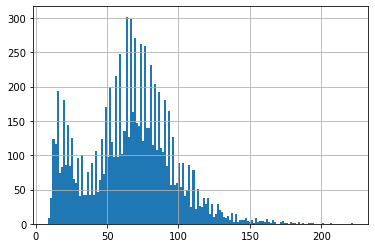

In [42]:
y = df.weight
X = df.drop({'weight'}, axis=1, inplace=False)
y.hist(bins=150)

7. Split the data set into a training set and a test set. Choose `test_size` = 0.3 and `random_state` = 55 
Print train and test size      
**Attention**: You are asked to use  [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [30]:
print("Applying linear regression---------------------")

print("X shape : ",X.shape)
print("y shape : ",y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
print("train set shape: ", X_train.shape, y_train.shape)
print("test set shape: ", X_test.shape, y_test.shape)

print("linear regression")
reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score=reg.score(X_test, y_test)
print('train score =', train_score)
print('test score = {}'.format(test_score))

print("Predict a known weigh")
index_to_predict = 100
print("Value to predict is ",y[73557+index_to_predict])
print(reg.predict(np.array(X.iloc[index_to_predict]).reshape(1,-1))[0])

Applying linear regression---------------------
X shape :  (9055, 8)
y shape :  (9055,)
train set shape:  (6338, 8) (6338,)
test set shape:  (2717, 8) (2717,)
linear regression
train score = 0.9752534875721713
test score = 0.9749508205857126
Predict a known weigh
Value to predict is  77
75.82350545752428


In [35]:
print("Try to predict user weight---------------------")

#List of Tuples
values = [(2, 1574, 0, 171, 26, 1, 1, 1)]
#Create a DataFrame object
newdf = pd.DataFrame(values, columns = ['salt' , 'calories', 'alcohol', 'height' , 'mass_index', 'dentition' , 'smell_taste_perf','pregnant_breastfeed'], index=[0]) 

print("newdf head")
print(newdf.head(1))

X = newdf
print("Value to predict is an unknown weight")
print("Value predicted is : ",reg.predict(np.array(X.iloc[0]).reshape(1,-1))[0])

Try to predict user weight---------------------
newdf head
   salt  calories  alcohol  ...  dentition  smell_taste_perf  pregnant_breastfeed
0     2      1574        0  ...          1                 1                    1

[1 rows x 8 columns]
Value to predict is an unknown weight
Value predicted is :  76.52144169342242


Check for better % using linear regression

In [0]:
for j in range (1, 300, 1):
  for i in range(1, 100, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/100),  random_state=j)
    reg=LinearRegression()
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    test_score=reg.score(X_test, y_test)
    if( train_score > 0.3 and test_score > 0.3):
      print(i/100)
      print(j)
      print  ('train score =', train_score)
      print  ('test score = {}'.format(test_score))

Check for better % using logistic regression

In [0]:
for j in range (1, 100, 1):
  for i in range(1, 50, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/100),  random_state=j)
    clf = LogisticRegression(max_iter=300000000)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    if( train_score > 0.5 and test_score > 0.5):
      print(i/100)
      print(j)
      print  ('train score =', train_score)
      print  ('test score = {}'.format(test_score))